# Clasificador de Mensajes Spam

### Carlos Villanueva - A00354031
### 21/Nov/2018

In [22]:
import numpy as np
import pandas as pd

## Cargar Datos

In [23]:
# data_frame = pd.read_csv('spam.csv')

# Pasar atributo 'encoding', para evitar
# error causado por caracteres especiales.
data_frame = pd.read_csv('spam.csv', encoding="ISO-8859-1")

data_frame.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Preparar Datos

In [24]:
# Eliminar columnas extra innecesarias
data_frame = data_frame.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

# Mejorar nombres de las columnas
data_frame.columns = ['isSpam', 'message']

data_frame.head()

,isSpam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
# Convertir valores de columna 'isSpam' a 0s y 1s
binary_data_frame = data_frame
is_spam_binary_map = {'ham': 0, 'spam': 1}
binary_data_frame['isSpam'] = binary_data_frame['isSpam'].map(is_spam_binary_map)

binary_data_frame.head()

,isSpam,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Conteo de tokens

In [26]:
# Convertimos los mensajes a una matriz de conteo de 'tokens'
# Utilizando 'CountVectorizer' de 'scikit-learn'
#
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

# Pasar atributo 'decode_error' para evitar errores por caracteres especiales ({‘strict’, ‘ignore’, ‘replace’})
count_vectorizer = CountVectorizer(decode_error='ignore')

In [27]:
# Convertimos los mensajes a una matriz de TF-IDF
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = CountVectorizer(decode_error='ignore')

In [28]:
X = count_vectorizer.fit_transform(binary_data_frame['message'])
# X = tf_idf_vectorizer.fit_transform(binary_data_frame['message'])

# Crear Y (con los valores 'isSpam') como una matriz:
Y = binary_data_frame['isSpam'].as_matrix()

/Users/crvo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


## Entrenamiento-Prueba

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

## Clasificación con Naive Bayes

In [30]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, Y_train)

naive_bayes_train_score = naive_bayes_model.score(X_train, Y_train)
print('Naive-Bayes train score:', naive_bayes_train_score)

naive_bayes_test_score = naive_bayes_model.score(X_test, Y_test)
print('Naive-Bayes test score:', naive_bayes_test_score)

Naive-Bayes train score: 0.9933333333333333
Naive-Bayes test score: 0.9832535885167464


## Clasificación con Ada Boost

In [31]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_model = AdaBoostClassifier()
ada_boost_model.fit(X_train, Y_train)

ada_boost_train_score = ada_boost_model.score(X_train, Y_train)
print('Ada-Boost train score:', ada_boost_train_score)

ada_boost_test_score = ada_boost_model.score(X_test, Y_test)
print('Ada-Boost test score:', ada_boost_test_score)

Ada-Boost train score: 0.9776923076923076
Ada-Boost test score: 0.97188995215311


## Visualización de datos

In [32]:
# https://github.com/amueller/word_cloud
#
# instalar con 'conda': 
# conda install -c conda-forge wordcloud
#
# instalar con 'pip':
# pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [33]:
# WordCloud 
# docs: https://amueller.github.io/word_cloud/index.html
# tutorial: https://www.datacamp.com/community/tutorials/wordcloud-python

def show_wordcloud(isSpamValue):
    all_messages = ''
    for message in data_frame[data_frame['isSpam'] == isSpamValue]['message']:
        all_messages += message + ' '
    all_messages.lower()
    wordcloud = WordCloud(width=1000, height=500).generate(all_messages)
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

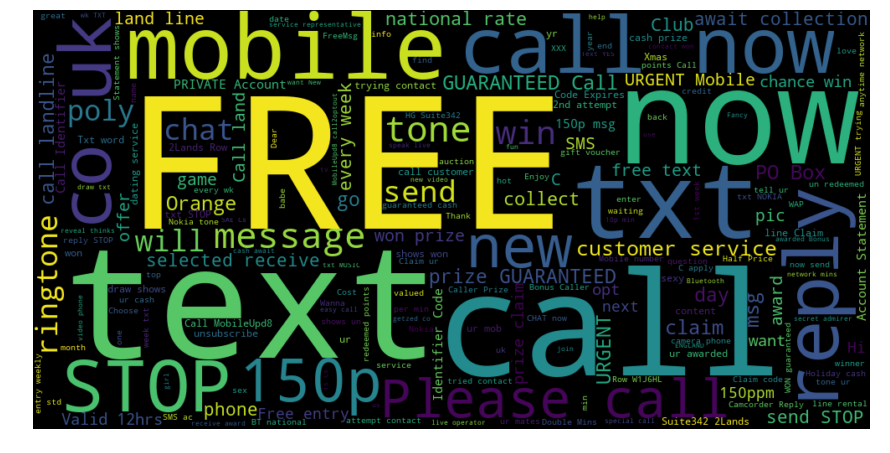

In [34]:
show_wordcloud(1)